# EcoFOCIpy ADCP QC - 24BSP-4A

- mostly remove >500 cm/s flows in u/v


In [4]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [5]:
xdf = xa.load_dataset('24bsp4a_0059m.trimmed.nc')

In [6]:
len(xdf.depth)

18

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

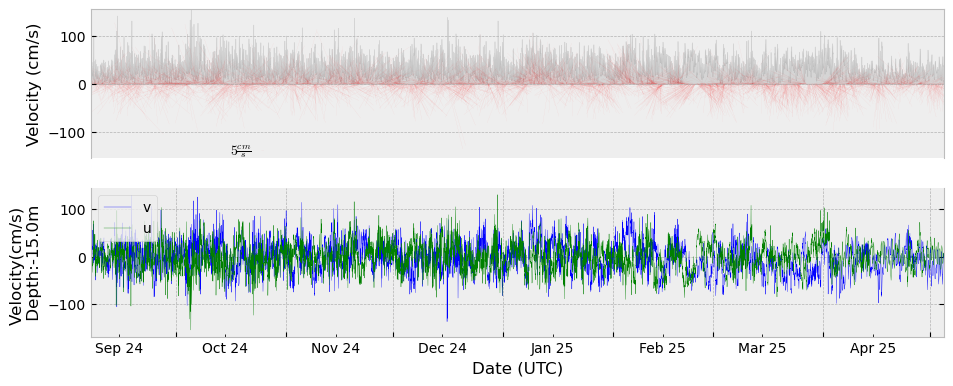

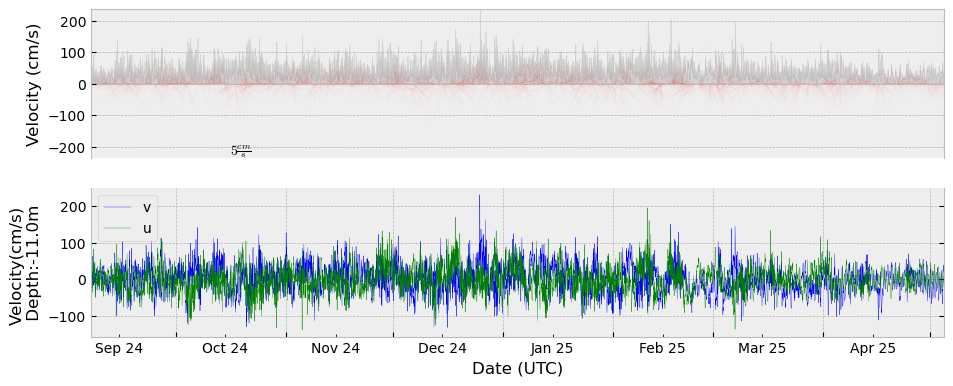

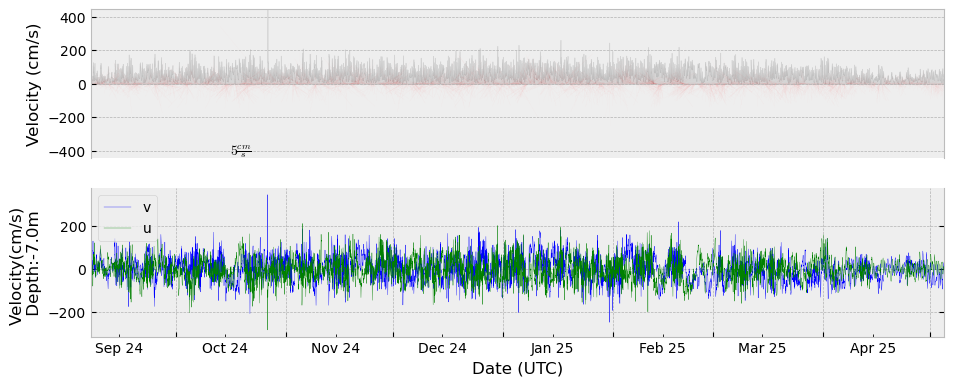

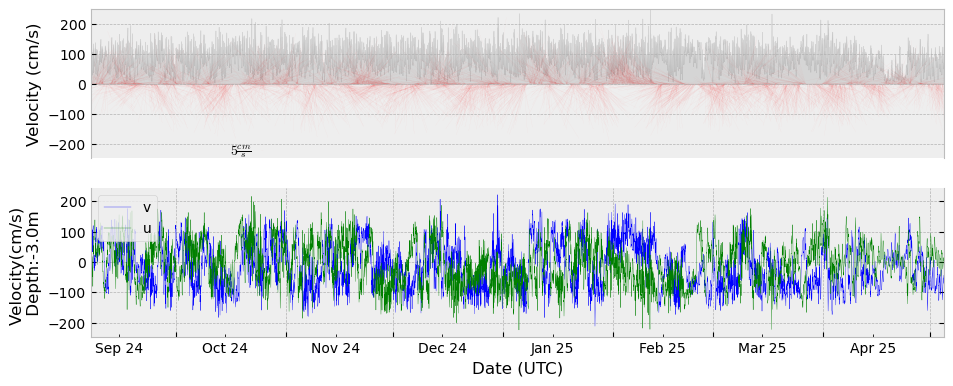

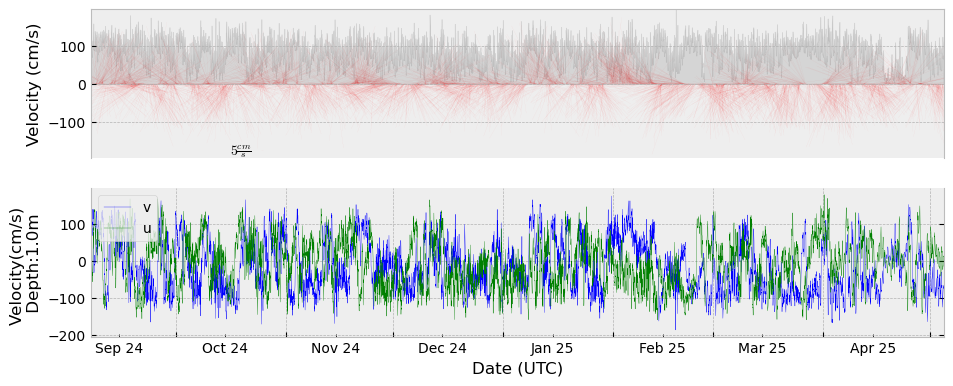

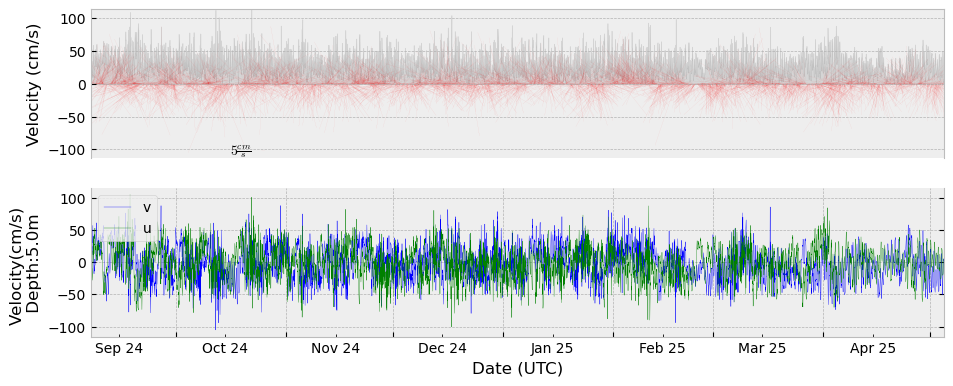

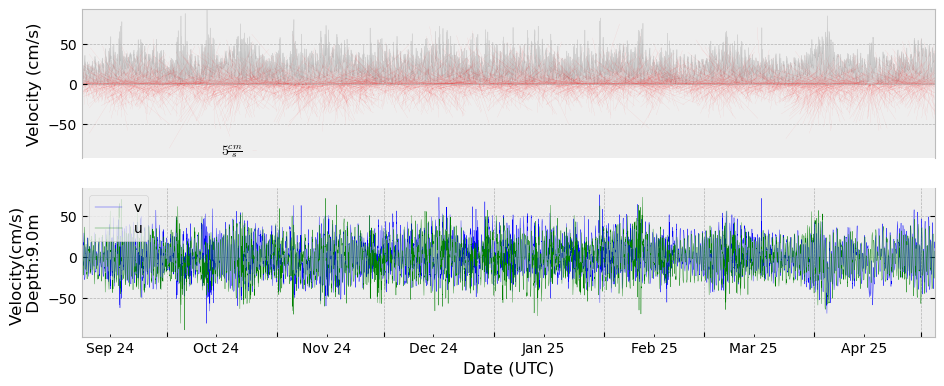

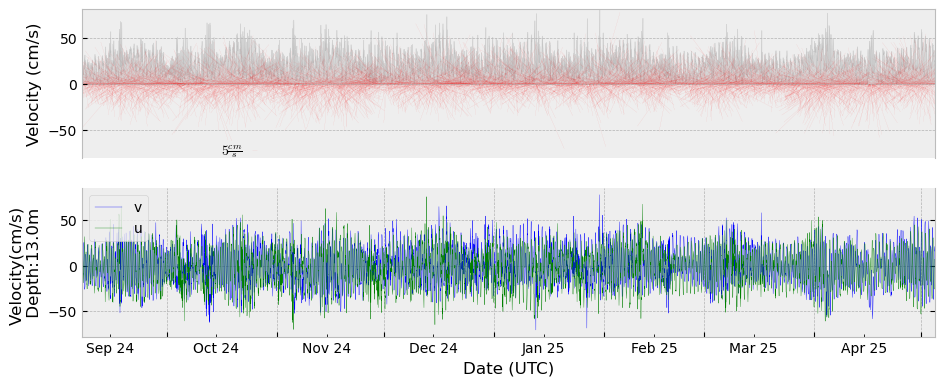

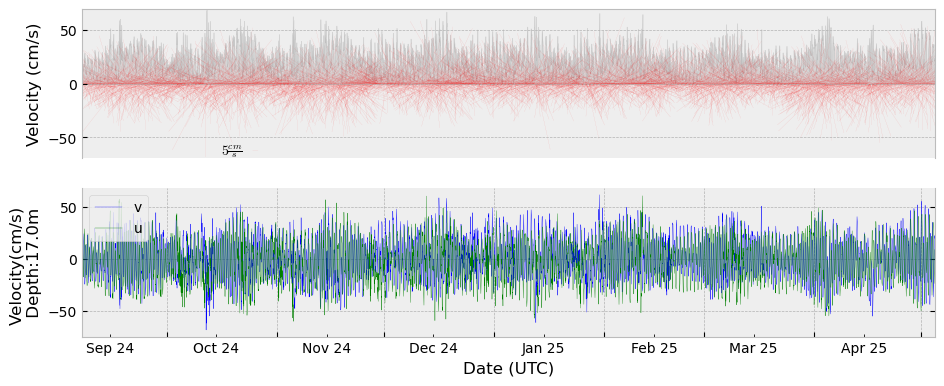

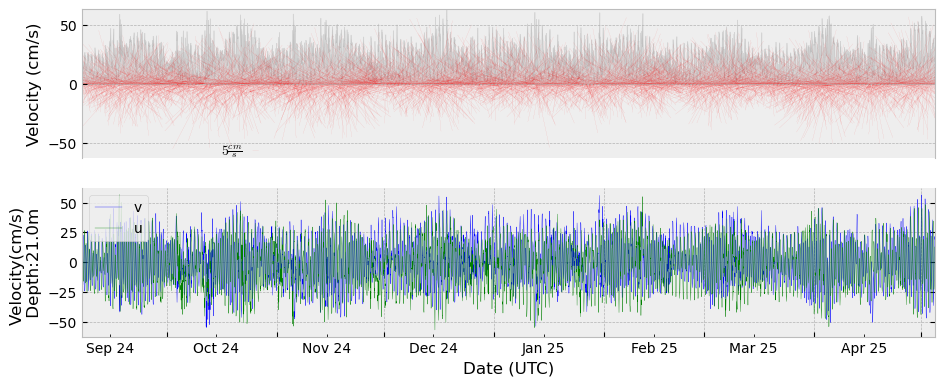

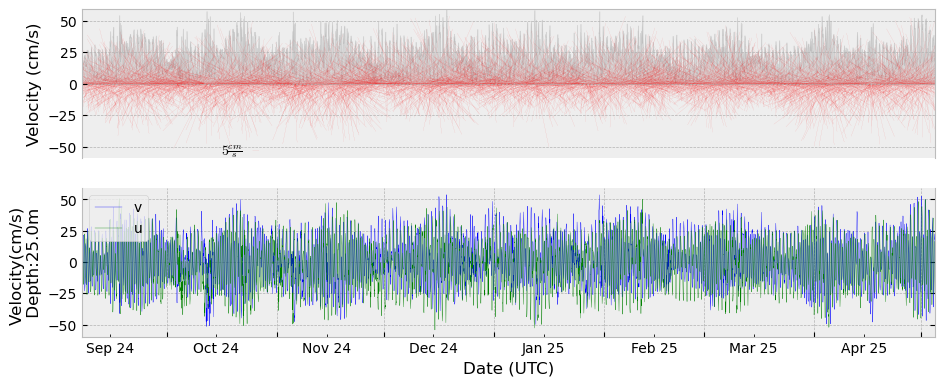

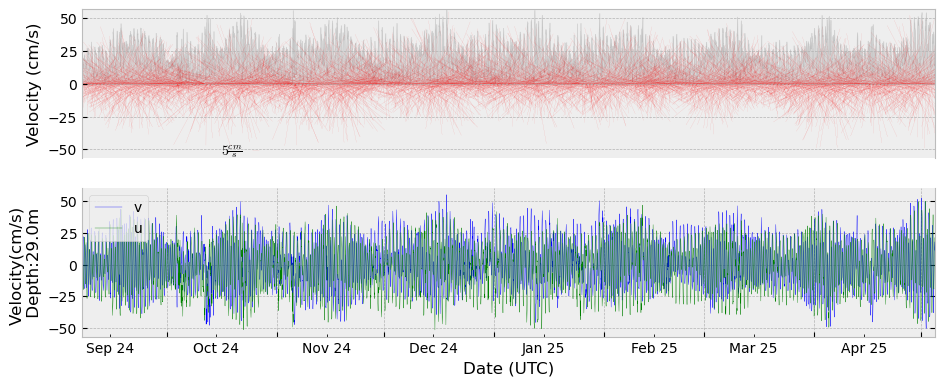

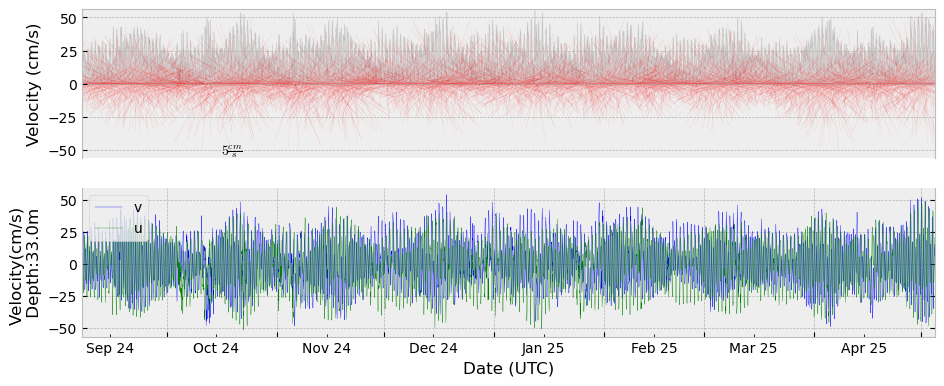

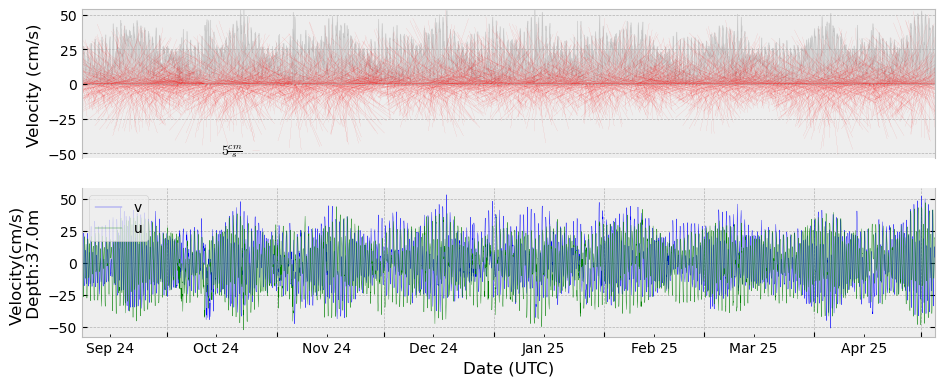

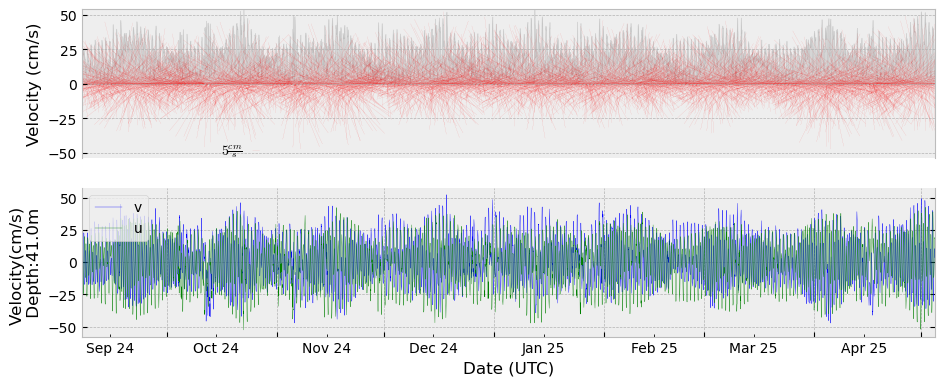

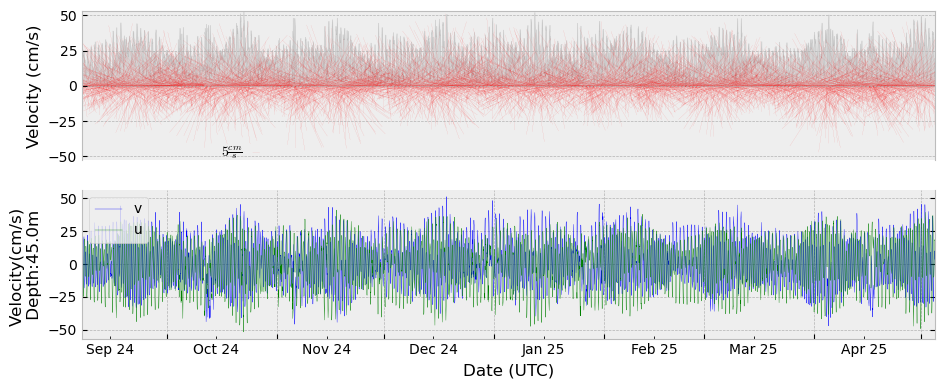

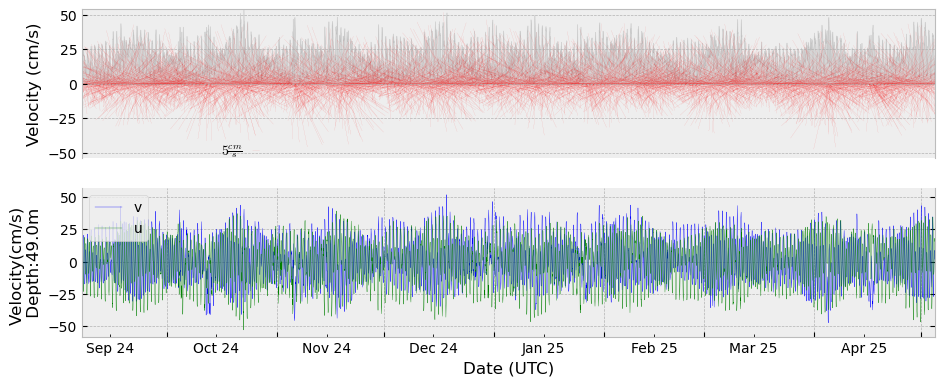

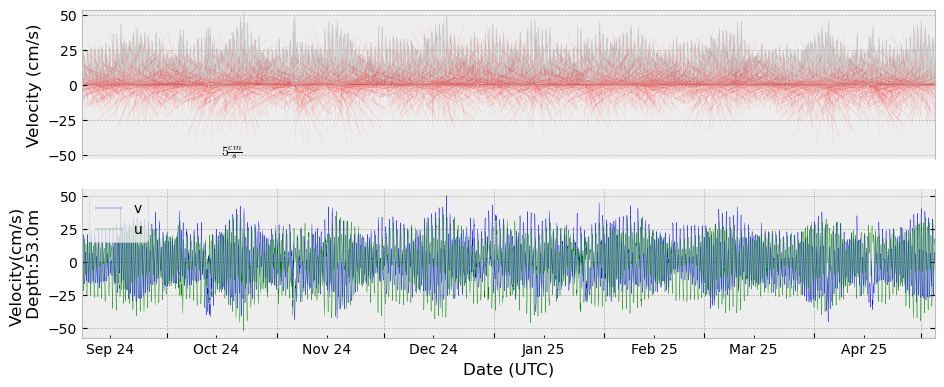

In [7]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [8]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset> Size: 7MB
Dimensions:          (latitude: 1, longitude: 1, time: 5753, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 46kB 2024-09-07T06:00:00 ... 2025-...
  * depth            (depth) float64 144B -15.0 -11.0 -7.0 ... 45.0 49.0 53.0
  * latitude         (latitude) float64 8B 57.87
  * longitude        (longitude) float64 8B -168.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 828kB -0.0987...
    v_curr_comp      (latitude, longitude, time, depth) float64 828kB 4.539 ....
    w_curr_comp      (latitude, longitude, time, depth) float64 828kB -4.5 .....
    w_curr_comp_err  (latitude, longitude, time, depth) float64 828kB 29.7 .....
    agc1             (latitude, longitude, time, depth) float64 828kB 95.0 .....
    agc2             (latitude, longitude, time, depth) float64 828kB 95.0 .....
    agc3             (latitude, longitude, time, depth) float64 828kB 90.0 .....
    agc4             (latitude, longitude, time, depth) float64 828kB 94.0 .....
Attributes: (12/13)
    Latitude_DegMMddW:                      57 52.2388 N
    Longitude_DegMMddN:                     168 53.1955 W
    MooringID:                              24BSP-4A
    platform_deployment_date:               2024-09-07T05:32:01Z
    platform_deployment_cruise_name:        DY2410
    platform_recovery_date:                 2025-05-04T22:12:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             70.6
    date_created:                           2025-06-03T08:01:34Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [9]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

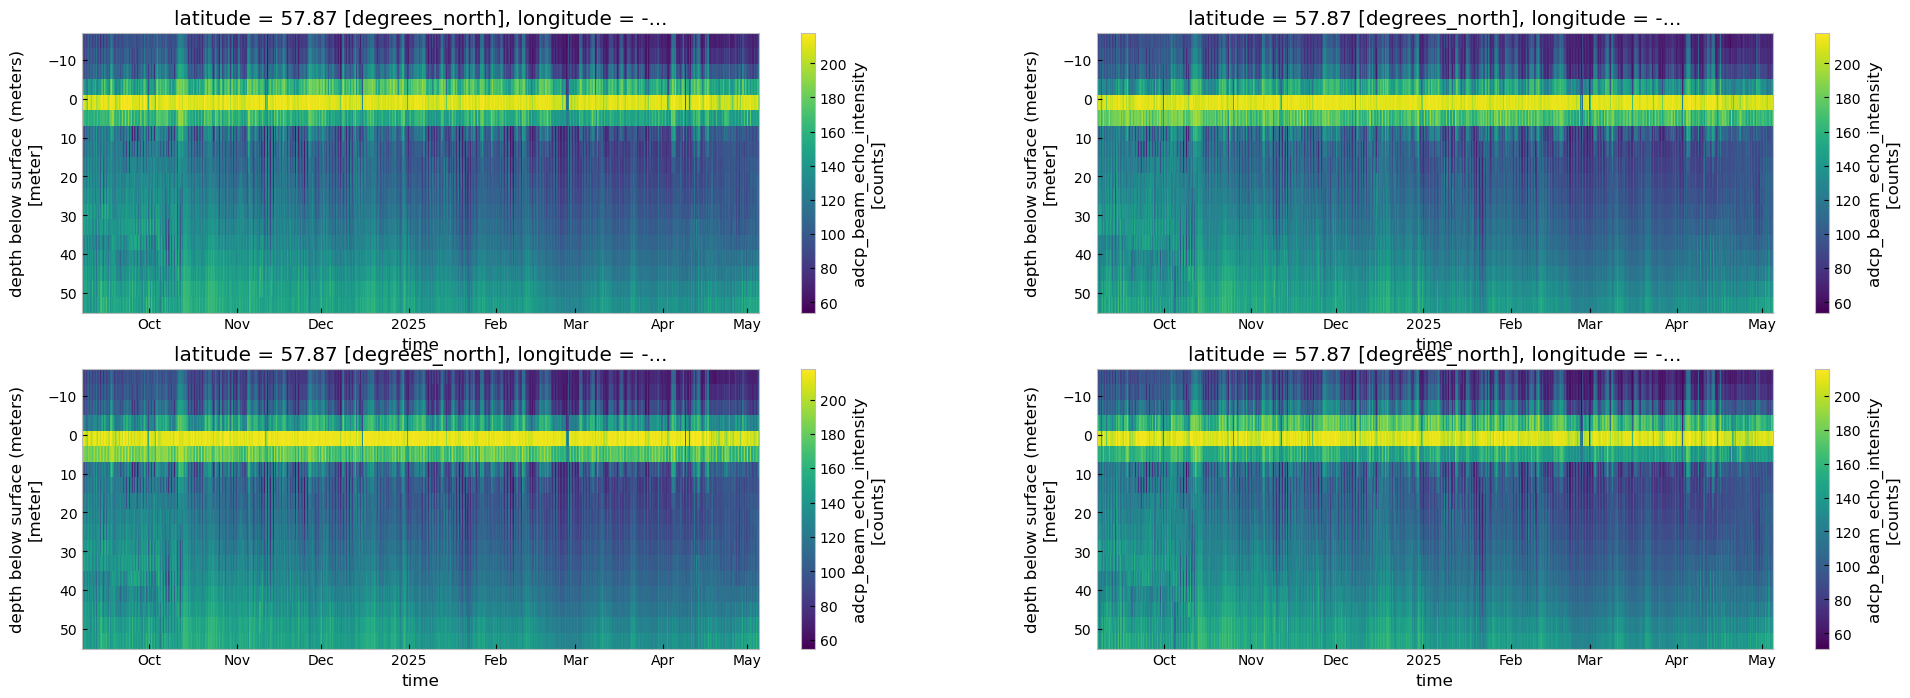

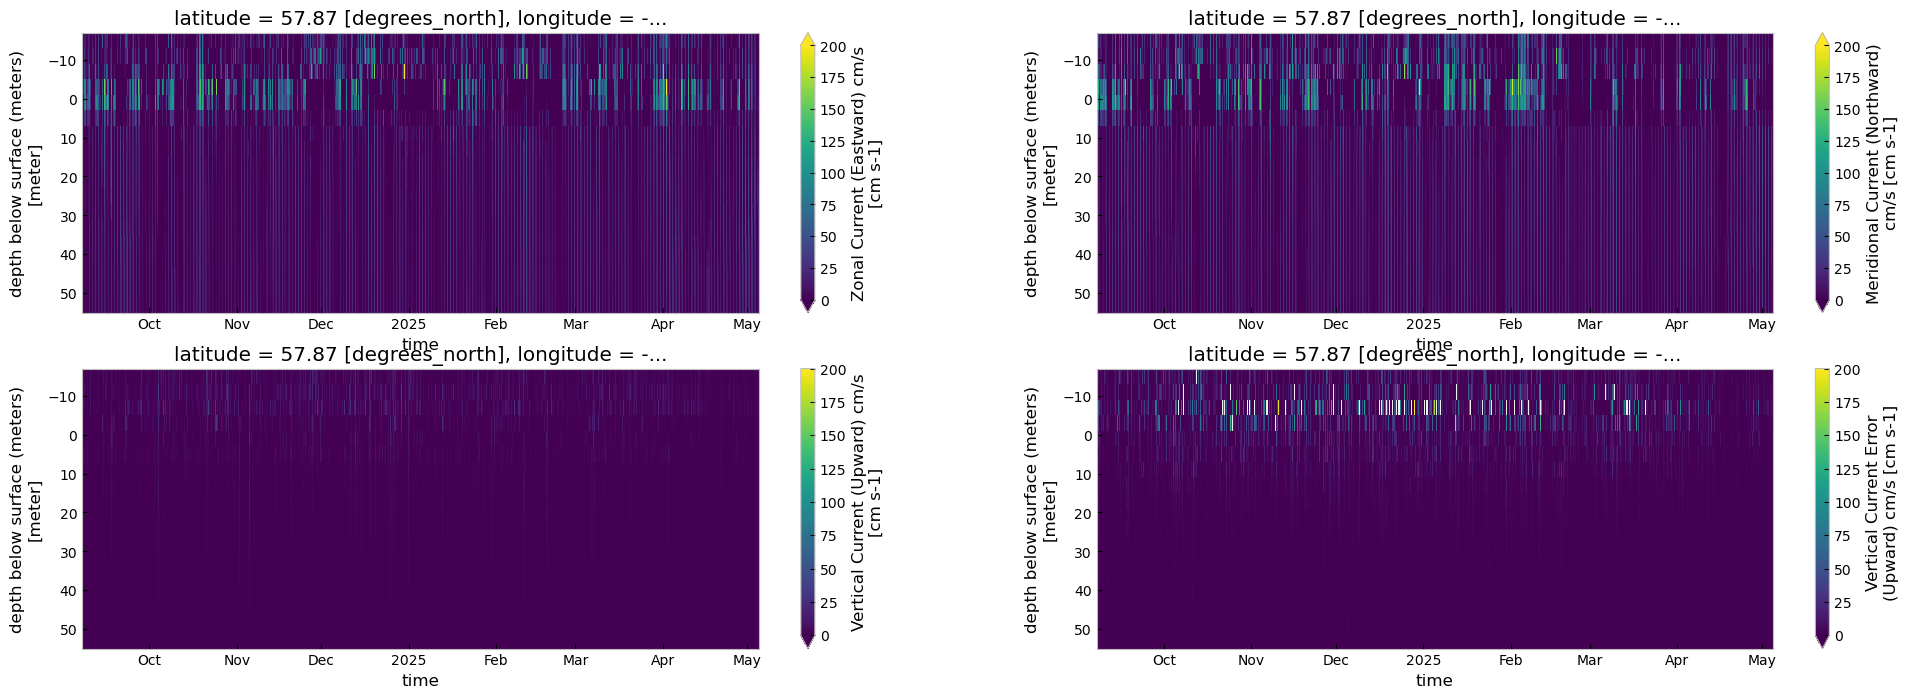

In [10]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [11]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [12]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [14]:
ixdf.to_netcdf('24bsp4a_0059m.trimmed.nc')

In [15]:
xdf = xa.load_dataset('24bsp4a_0059m.trimmed.nc')

In [16]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/du

## Interpolate over singleton missing gaps linearly

In [17]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [18]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [19]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

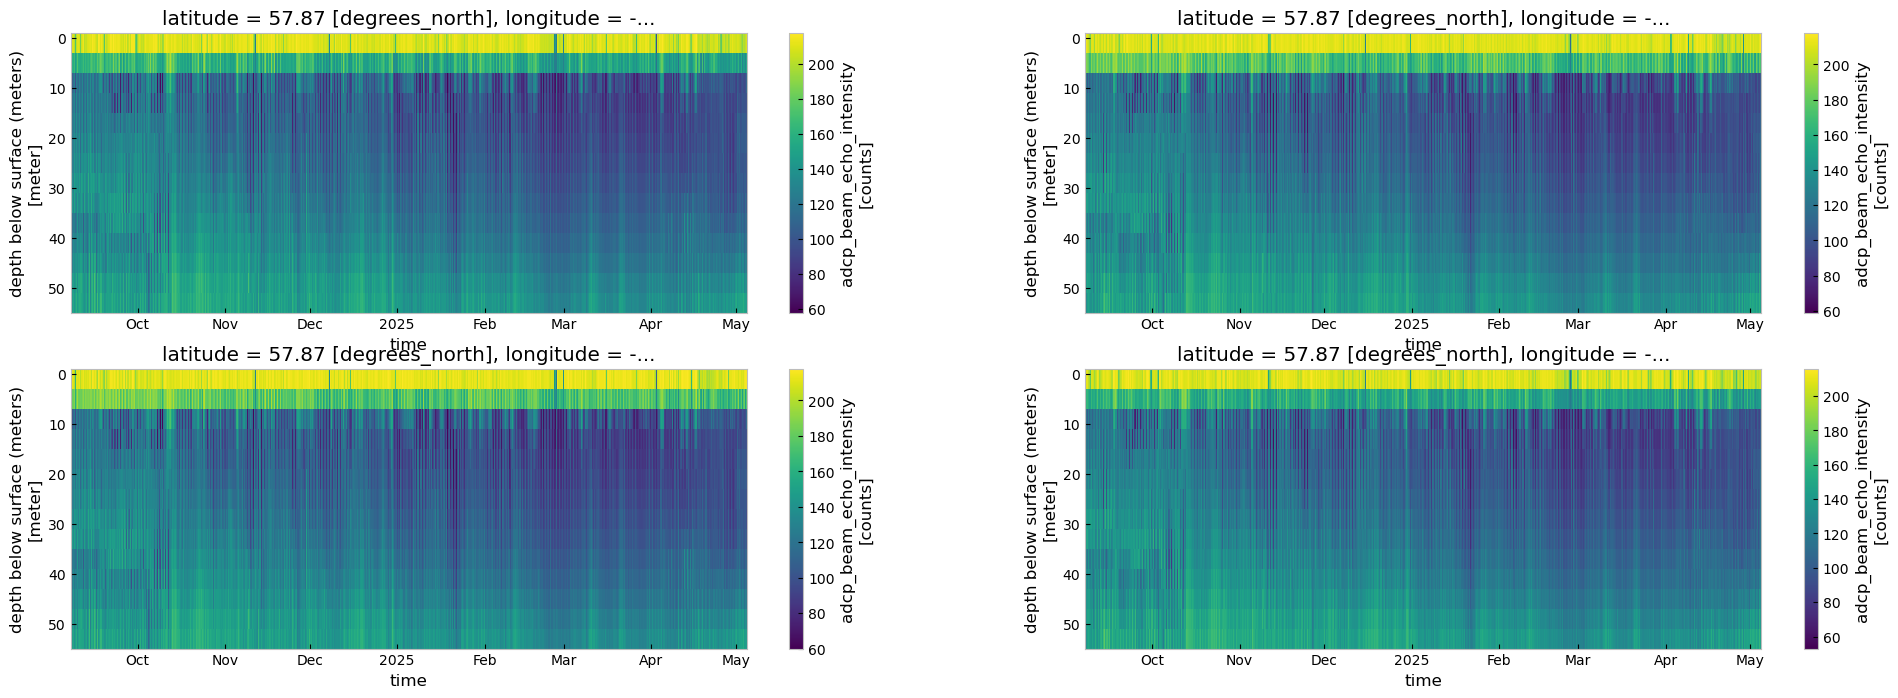

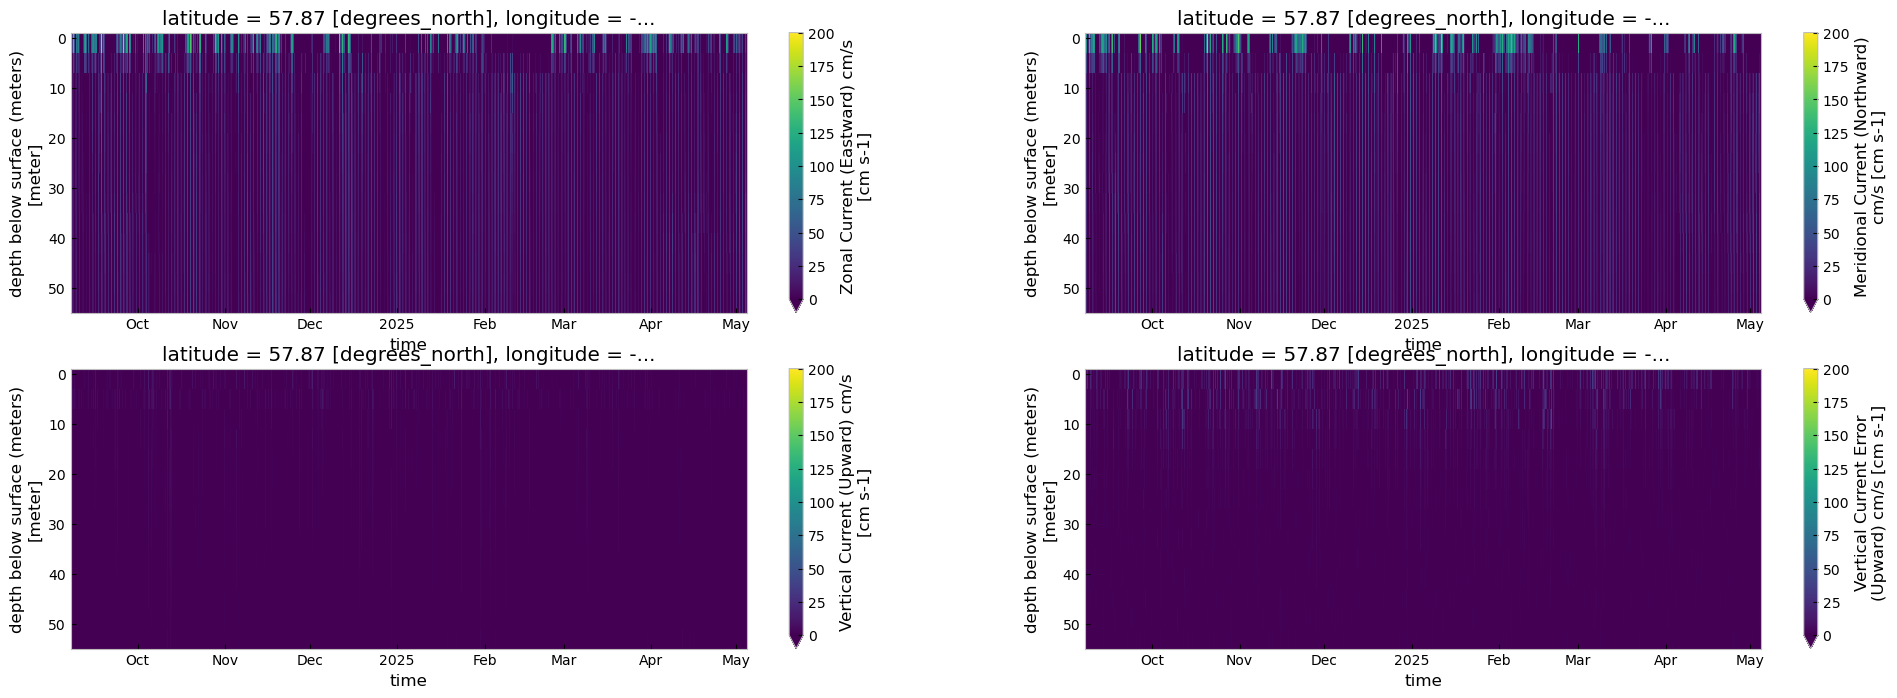

In [20]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [21]:
ixdf.to_netcdf('24bsp4a_0059m.filtered.nc')